# Описание проекта
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных из файла

In [1]:
# Импортируем библиотеку Pandas.
import pandas as pd
# Импортируем библиотеку для постраения графиков matplotlib.pyplot.
import matplotlib.pyplot as plt
# Импортируем библиотеку для постраения графиков seaborn.
import seaborn as sns
# Импортируем библиотеку для высокоуровневых математических функций numpy.
import numpy as np
# Импортируем библиотеку для работы с функциями и константами
import math
# Импортируем библиотеку для для более глубоких и сложных научных вычислений
import scipy
from scipy import stats as st
# Импортируем модуль для отключения предпреждений
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Описание данных `df`<br>

•	**Name** — название игры<br>
•	**Platform** — платформа<br>
•	**Year_of_Release** — год выпуска<br>
•	**Genre** — жанр игры<br>
•	**NA_sales** — продажи в Северной Америке (миллионы проданных копий)<br>
•	**EU_sales** — продажи в Европе (миллионы проданных копий)<br>
•	**JP_sales** — продажи в Японии (миллионы проданных копий)<br>
•	**Other_sales** — продажи в других странах (миллионы проданных копий)<br>
•	**Critic_Score** — оценка критиков (максимум 100)<br>
•	**User_Score** — оценка пользователей (максимум 10)<br>
•	**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>

### Информация по  `df`<br>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Наш `DataFrame` имеет 11 стобцов и 16715 строк.<br>
Столбцы `[Name, Platform, Genre, User_Score, Rating]` имеют тип данных `object`.<br>
Остальные столбцы имеют тип данных `float64`<br>
Нужно проанализировать столбцы и, по потребности, поменять тип данных.<br>
Столбцы `[Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating]` имеют пропуски, с которыми нужно проработать.

## Предобработка данных

In [4]:
# Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Анализ и обрабока каждого столбца DataFrame

In [5]:
# Проверим весь дата сет на дубликаты методом duplicated()
df.duplicated().sum()

0

#### Обработка `name`

In [6]:
# Проверим данный столбц на пропуски
df['name'].isna().sum()

2

In [7]:
# Удалим пропущенные значения 
df = df.dropna(subset=['name'])
df = df.reset_index()

In [8]:
# Приведем все значения к нижнему регистру
df['name'] = df['name'].str.lower()

In [9]:
# Проверим на явные дубликаты duplicated()
df['name'].duplicated().sum()

5154

In [10]:
# Проверим дубликаты методом value_counts()
df['name'].value_counts()

need for speed: most wanted                         12
ratatouille                                          9
lego marvel super heroes                             9
fifa 14                                              9
madden nfl 07                                        9
                                                    ..
jewels of the tropical lost island                   1
sherlock holmes and the mystery of osborne house     1
the king of fighters '95 (cd)                        1
megamind: mega team unite                            1
haitaka no psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [11]:
# Посмотрим, что за дубликаты на примере fifa 14
name_dup = df.query('name == "fifa 14"')
name_dup

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,126,fifa 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,271,fifa 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,469,fifa 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1752,1753,fifa 14,XOne,2013.0,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4698,4699,fifa 14,PSV,2013.0,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4808,4809,fifa 14,PC,2013.0,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4984,4985,fifa 14,Wii,2013.0,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
6870,6871,fifa 14,3DS,2013.0,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7874,7875,fifa 14,PSP,2013.0,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E


Мы наблюдаем одинаковые имена игр, но на разных платформах. Это считать за дубликаты **нельзя**. Но эту информацию можно использовать для заполнения пропусков в некоторых столбцах.

#### Обработка `platform`

In [12]:
# Проверим данный столбц на пропуски
df['platform'].isna().sum()

0

In [13]:
# Приведем все значения к нижнему регистру
df['platform'] = df['platform'].str.lower()

In [14]:
# Проверим уникальные значения методом unique()
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

#### Обработка `year_of_release`

In [15]:
# Проверим данный столбц на пропуски
df['year_of_release'].isna().sum()

269

In [16]:
# Заменим пропуски медианой, остальные пропуски удалим.  
df['year_of_release'] = df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform('median'))
df = df.dropna(subset=['year_of_release'])

In [17]:
# Проверим данный столбц на пропуски
df['year_of_release'].isna().sum()

0

In [18]:
# Заменим тип данных на int
df['year_of_release'] = df['year_of_release'].astype('int')

#### Обработка `genre`

In [19]:
# Проверим данный столбц на пропуски
df['genre'].isna().sum()

0

In [20]:
# Приведем все значения к нижнему регистру
df['genre'] = df['genre'].str.lower()

In [21]:
# Проверим уникальные значения методом unique()
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

#### Обработка `na_sales` / `eu_sales` / `jp_sales `/ `other_sales`

In [22]:
# Проверим данный столбц на пропуски
print(df['na_sales'].isna().sum())
print(df['na_sales'].isna().sum())
print(df['na_sales'].isna().sum())
print(df['na_sales'].isna().sum())

0
0
0
0


#### Обработка `critic_score`

In [23]:
# Проверим данный столбц на пропуски
df['critic_score'].isna().sum()

8492

In [24]:
# Заменим пропуски средним значеним относительно жанра игры
df['critic_score'] = df['critic_score'].fillna(df.groupby('genre')['critic_score'].transform('mean'))

In [25]:
# Еще раз роверим данный столбц на пропуски
df['critic_score'].isna().sum()

0

In [26]:
# Округлим значения до второго символа методом .round(2)
df['critic_score'] = df['critic_score'].round(2)

#### Обработка `user_score`

In [27]:
# Проверим данный столбц на пропуски
df['user_score'].isna().sum()

6633

In [28]:
# Так же видим столбце присутсвует значение 'tbd'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [29]:
# В столбце присутсвует значение 'tbd', посчитаем количество
df[df['user_score'] == 'tbd'].shape[0]

2394

Мы имеем 2394 значеий в `df['user_score']` со значеним 'tbd' - оно значит, что рейтиг еще не определен. Заменим его на 0, далее заменим на среднее в жанре.

In [30]:
# Заменим данное значение сначала на 0, для того, чтобы мы могли работать изменить тип данных столбца
df.loc[(df.user_score == 'tbd'), 'user_score'] = 0

In [31]:
# Меняем тип данных с object на float
df['user_score'] = df['user_score'].astype('float')

In [32]:
# Заменим пропуски средним значеним относительно жанра игры
df['user_score'] = df['user_score'].fillna(df.groupby('name')['user_score'].transform('mean'))

In [33]:
# Проверим данный столбц на пропуски
df['user_score'].isna().sum()

6204

In [34]:
# Заменим оставшиеся пропуски средним значеним относительно жанра игры
df['user_score'] = df['user_score'].fillna(df.groupby('genre')['user_score'].transform('mean'))

In [35]:
# Проверим данный столбц на пропуски
df['user_score'].isna().sum()

0

In [36]:
# Заменим рейтинг, который мы ставили 0, на среднее значение по жанрам, для того, чтобы в дальнейшем это не вляло на результаты
df.loc[(df.user_score == 0), 'user_score'] = df.groupby('genre')['user_score'].transform('mean')

In [37]:
# Округлим значения до второго символа методом .round(2)
df['user_score'] = df['user_score'].round(2)

#### Обработка `rating`

In [38]:
# Проверим данный столбц на пропуски
df['rating'].isna().sum()

6699

In [39]:
# Приведем все значения к нижнему регистру
df['rating'] = df['rating'].str.lower()

In [40]:
# Проверим уникальные значения методом unique()
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [41]:
# Заменим пропуски значениями из тех же игр
df['rating'] = df['rating'].fillna(df.groupby('name')['rating'].ffill())
df['rating'] = df['rating'].fillna(df.groupby('name')['rating'].bfill())

In [42]:
# Проверим данный столбц на пропуски
df['rating'].isna().sum()

6262

Мы обработали все столбцы ДФ. В столбце rating мы совсем немного пропусков заменили, но большая часть осталась. Заменять их не будем, оставим как есть.

## Расчёты и добавление результатов в таблицу

In [43]:
# Добавим столбец с общей суммой продаж игры
df['sum_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

## Исследовательский анализ данных

### Проанализируем сколько игр выпускалось в разные годы. Определим, важны ли данные за все периоды?

In [44]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     340
2000     351
2001     486
2002     844
2003     784
2004     765
2005     948
2006    1019
2007    1202
2008    1441
2009    1430
2010    1269
2011    1153
2012     662
2013     548
2014     581
2015     606
2016     502
Name: name, dtype: int64

#### Вывод

Мы видим, что до 1994 года выпускалось очень маленькое количество игр в год. Эти данные можем отбросить так как их мало и было это очень давно

In [45]:
df = df.query('year_of_release > 1994')
df

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
2,2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,72.67,7.36,NaN,31.38
6,6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,e,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,66.66,5.85,NaN,0.01
16709,16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,72.00,5.07,NaN,0.01
16710,16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,65.27,4.72,NaN,0.01
16711,16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,68.07,5.50,NaN,0.01


Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы.

In [46]:
df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
ps2     1247.16
x360     966.61
ps3      935.19
wii      903.31
ds       804.26
ps       721.55
ps4      314.14
gba      313.73
psp      293.57
3ds      258.53
xb       256.69
pc       242.89
n64      218.48
gc       198.66
xone     159.32
gb       139.90
wiiu      82.19
psv       53.81
snes      49.59
sat       29.94
dc        15.95
2600       2.53
ws         1.42
ng         0.43
tg16       0.16
3do        0.08
pcfx       0.03
Name: sum_sales, dtype: float64

### TOP 5 Платформ по продажам в разрезе по годам

In [47]:
# Создадим функцию построения графиков, чтобы не дублировать код много раз
def plot(x,y):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, '*-r', alpha=1, label="Sales", lw=1, mec='r', mew=1, ms=7)
    plt.bar(x, y, color='black', alpha=0.75, align='center')
    plt.legend()
    plt.grid(True)
    plt.title('Гистограмма выручки по годам')
    plt.xlabel('Год')
    plt.ylabel('Выручка')

In [48]:
# Построим таблицу для ps2, где посмотрим выручку по годам
ps2 = df.query('platform == "ps2"')
ps2_pivot = ps2.pivot_table(index='year_of_release', values=['sum_sales'], aggfunc='sum').reset_index()
ps2_pivot

,year_of_release,sum_sales
0,2000,39.17
1,2001,166.43
2,2002,208.36
3,2003,193.05
4,2004,212.76
5,2005,160.91
6,2006,103.99
7,2007,76.10
8,2008,53.90
9,2009,26.40


Text(0.3, 0, 'Рисунок 1. - Гистограмма выручки млн. в год (ps2)')

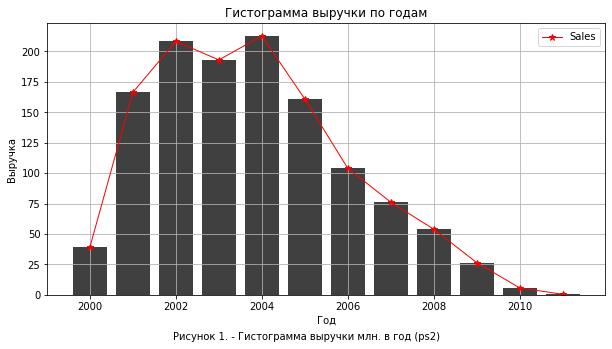

In [49]:
# Построим гистограмму по изменению выручки по годам для ps2
plot(ps2_pivot['year_of_release'], ps2_pivot['sum_sales'])
plt.figtext(0.3, 0, "Рисунок 1. - Гистограмма выручки млн. в год (ps2)")

In [50]:
# Построим таблицу для x360, где посмотрим выручку по годам
x360 = df.query('platform == "x360"')
x360_pivot = x360.pivot_table(index='year_of_release', values=['sum_sales'], aggfunc='sum').reset_index()
x360_pivot

,year_of_release,sum_sales
0,2005,9.22
1,2006,51.79
2,2007,95.41
3,2008,136.07
4,2009,120.82
5,2010,170.55
6,2011,145.23
7,2012,100.72
8,2013,88.58
9,2014,34.74


Text(0.3, 0, 'Рисунок 2. - Гистограмма выручки млн. в год (x360)')

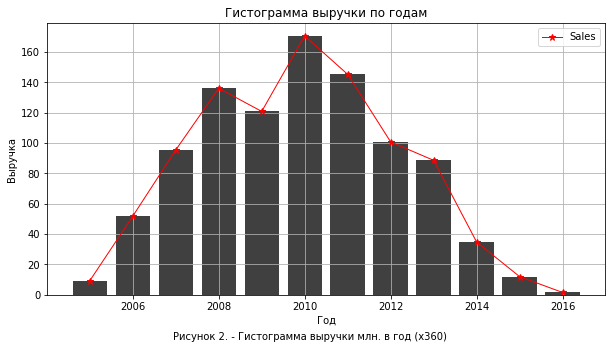

In [51]:
# Строим гистограмму по изменению выручки по годам для x360
plot(x360_pivot['year_of_release'], x360_pivot['sum_sales'])
plt.figtext(0.3, 0, "Рисунок 2. - Гистограмма выручки млн. в год (x360)")

In [52]:
# Построим таблицу для ps3, где посмотрим выручку по годам
ps3 = df.query('platform == "ps3"')
ps3_pivot = ps3.pivot_table(index='year_of_release', values=['sum_sales'], aggfunc='sum').reset_index()
ps3_pivot

,year_of_release,sum_sales
0,2005,0.19
1,2006,21.44
2,2007,73.19
3,2008,118.79
4,2009,130.93
5,2010,142.96
6,2011,157.98
7,2012,108.28
8,2013,113.25
9,2014,47.76


Text(0.3, 0, 'Рисунок 3. - Гистограмма выручки млн. в год (ps3)')

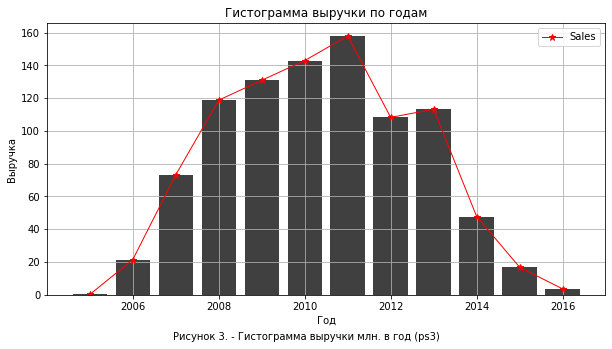

In [53]:
# Строим гистограмму по изменению выручки по годам для ps3
plot(ps3_pivot['year_of_release'], ps3_pivot['sum_sales'])
plt.figtext(0.3, 0, "Рисунок 3. - Гистограмма выручки млн. в год (ps3)")

In [54]:
# Построим таблицу для wii, где посмотрим выручку по годам
wii = df.query('platform == "wii"')
wii_pivot = wii.pivot_table(index='year_of_release', values=['sum_sales'], aggfunc='sum').reset_index()
wii_pivot

,year_of_release,sum_sales
0,2006,140.19
1,2007,153.41
2,2008,177.68
3,2009,206.97
4,2010,128.67
5,2011,59.79
6,2012,22.94
7,2013,8.59
8,2014,3.75
9,2015,1.14


Text(0.3, 0, 'Рисунок 4. - Гистограмма выручки млн. в год (wii)')

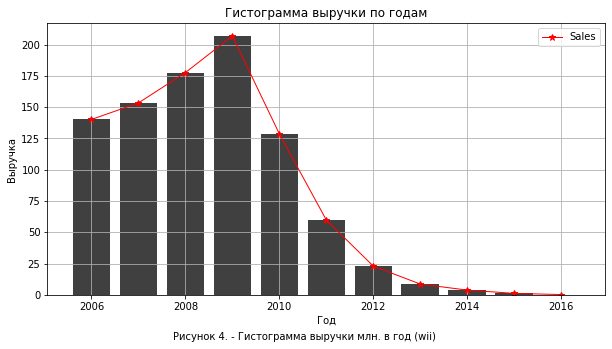

In [55]:
# Строим гистограмму по изменению выручки по годам для wii
plot(wii_pivot['year_of_release'], wii_pivot['sum_sales'])
plt.figtext(0.3, 0, "Рисунок 4. - Гистограмма выручки млн. в год (wii)")

In [56]:
# Построим таблицу для ds, где посмотрим выручку по годам
ds = df.query('platform == "ds"')
ds_pivot = ds.pivot_table(index='year_of_release', values=['sum_sales'], aggfunc='sum').reset_index()
ds_pivot

,year_of_release,sum_sales
0,2004,17.27
1,2005,130.14
2,2006,119.81
3,2007,147.23
4,2008,145.36
5,2009,119.56
6,2010,85.35
7,2011,26.33
8,2012,11.67
9,2013,1.54


Text(0.3, 0, 'Рисунок 5. - Гистограмма выручки млн. в год (ds)')

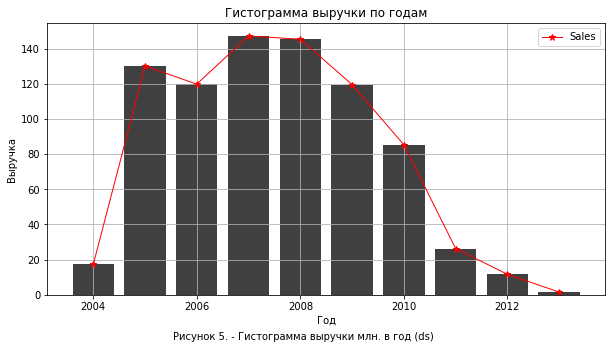

In [57]:
# Строим гистограмму по изменению выручки по годам для ds
plot(ds_pivot['year_of_release'], ds_pivot['sum_sales'])
plt.figtext(0.3, 0, "Рисунок 5. - Гистограмма выручки млн. в год (ds)")

#### Вывод

Мы можем наблюдать, что независимо, какая платформа, срок "жизни" ее составляет около 5-6 лет с момента релиза. Далее, выручки заметно падают.

### Анализ за 2012-2016 годы

Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Отталкиваясь от того, что в среднем каждая платформа показывает рост и приносить прибыль 5-6 лет, то для прогноза на 2017 год, нам нужно взять платформы не старше 2012 года и посмотреть графики выруки за период 2012-2016. Данные за 2016 год данные не полные, ориентироваться на них не будем.

In [58]:
# Сделаем срез по годам от 2012 года
df_2012 = df.loc[(df.year_of_release >= 2012) & (df.year_of_release < 2017)].drop(columns = ['index'],axis = 1)
df_2012

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.00,8.20,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.00,8.10,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,70.28,6.37,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,72.67,7.36,NaN,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.00,5.30,m,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,65.27,4.72,NaN,0.01
16705,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,66.56,3.36,NaN,0.01
16708,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,66.66,5.85,NaN,0.01
16710,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,65.27,4.72,NaN,0.01


In [59]:
# Сгруппируем данные от 2012 года по выручке в каждой платформе
df_2012.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
ps4     314.14
ps3     289.71
x360    237.52
3ds     195.01
xone    159.32
wiiu     82.19
pc       63.51
psv      49.18
wii      36.60
ds       13.21
psp      11.69
Name: sum_sales, dtype: float64

Выделим 5 основных платфомы это - ps4, ps3, xone, 3ds, x360, и построим для них графики выручки по годам

In [60]:
ps4 = df_2012.query('platform == "ps4"')
ps3 = df_2012.query('platform == "ps3"')
xone = df_2012.query('platform == "xone"')
ds3 = df_2012.query('platform == "3ds"')
x360 = df_2012.query('platform == "x360"')

In [61]:
# Преобразуем данные в таблицы при помощи pivot_table
ps4_hist = ps4.pivot_table(index='year_of_release', values=['sum_sales'], aggfunc='sum').reset_index()
ps3_hist = ps3.pivot_table(index='year_of_release', values=['sum_sales'], aggfunc='sum').reset_index()
xone_hist = xone.pivot_table(index='year_of_release', values=['sum_sales'], aggfunc='sum').reset_index()
ds3_hist = ds3.pivot_table(index='year_of_release', values=['sum_sales'], aggfunc='sum').reset_index()
x360_hist = x360.pivot_table(index='year_of_release', values=['sum_sales'], aggfunc='sum').reset_index()

Text(0.3, 0, 'Рисунок 6. - Гистограмма выручки млн. в год по ТОП 5 платформ')

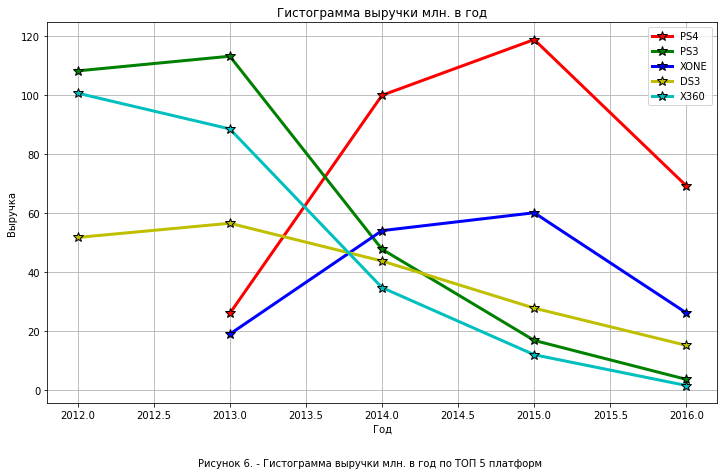

In [62]:
# Выедем данные на одном графике для понимания выручки платформ по годам
plt.figure(figsize=(12, 7))
plt.plot(ps4_hist['year_of_release'], ps4_hist['sum_sales'], '*-r', alpha=1, label="PS4", lw=3, mec='black', mew=1, ms=10)
plt.plot(ps3_hist['year_of_release'], ps3_hist['sum_sales'], '*-g', alpha=1, label="PS3", lw=3, mec='black', mew=1, ms=10)
plt.plot(xone_hist['year_of_release'], xone_hist['sum_sales'], '*-b', alpha=1, label="XONE", lw=3, mec='black', mew=1, ms=10)
plt.plot(ds3_hist['year_of_release'], ds3_hist['sum_sales'], '*-y', alpha=1, label="DS3", lw=3, mec='black', mew=1, ms=10)
plt.plot(x360_hist['year_of_release'], x360_hist['sum_sales'], '*-c', alpha=1, label="X360", lw=3, mec='black', mew=1, ms=10)

plt.legend()
plt.grid(True)
plt.title('Гистограмма выручки млн. в год')
plt.xlabel('Год')
plt.ylabel('Выручка')
plt.figtext(0.3, 0, "Рисунок 6. - Гистограмма выручки млн. в год по ТОП 5 платформ")

Смотря на график выше, мы можем увидеть, что поколение ps3/x360/3ds уходит, и с 2013 года ярко набирают популярность 2 платформы. Это ps4 и xone. На них и будем ориентироваться.

In [63]:
df_2012.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.00,8.20,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.00,8.10,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,70.28,6.37,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,72.67,7.36,NaN,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.00,5.30,m,13.79


### Ящик с усами по глобальным продажам игр в разбивке по платформам

In [64]:
df_global_platform = df_2012.pivot_table(index='platform', values=['sum_sales'], aggfunc='sum').reset_index()
df_global_platform.sort_values(by='sum_sales', ascending=False).head(10)

,platform,sum_sales
4,ps4,314.14
3,ps3,289.71
9,x360,237.52
0,3ds,195.01
10,xone,159.32
8,wiiu,82.19
2,pc,63.51
6,psv,49.18
7,wii,36.60
1,ds,13.21


Text(0.1, 0, "Рисунок 7. - 'Ящик с усами' по всей выручке")

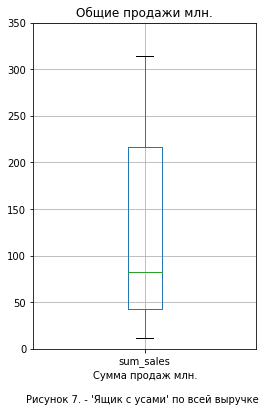

In [65]:
# Построим график "Ящик с усами"
plt.figure(figsize=(4, 6))
df_global_platform.boxplot('sum_sales', grid=True)
plt.ylim(0, 350)
plt.title('Общие продажи млн.')
plt.xlabel('Сумма продаж млн.')
plt.figtext(0.1, 0, "Рисунок 7. - 'Ящик с усами' по всей выручке")

#### Вывод

Если мы посмотри на "Ящик с усами" то мы можем увидеть, что медиана находится на уровне 80 и ближе к певрой квартили. График не имеет выбросов. Первые три квартили приходятся примерно от 45 до 220. 

### Корреляция рейтигов и продаж

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Посчитаем корреляцию между продажами и оценками на примере самой продаваемой платформы ps4

In [66]:
# Сделаем срез по данной платформе ps4
ps4 = df_2012.query('platform == "ps4"')
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,70.28,6.37,NaN,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.00,8.30,m,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.00,4.30,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,70.28,6.37,NaN,7.98
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.00,5.70,m,7.66


Text(0.2, 0, 'Рисунок 8. - График корреляции продаж и оценок критиков')

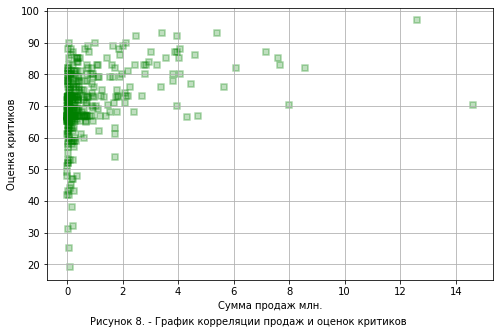

In [67]:
#Проверим, зависят ли продажи от оценки критиков (Построим несколько вариантов графиков)
#Построим диаграмму рассеяния 
plt.figure(figsize=(8, 5))
plt.scatter(ps4['sum_sales'], ps4['critic_score'], c='g', linewidths = 2, marker ="s", alpha=0.25)
plt.grid(True)
plt.xlabel('Сумма продаж млн.')
plt.ylabel('Оценка критиков')
plt.figtext(0.2, 0, "Рисунок 8. - График корреляции продаж и оценок критиков")

In [68]:
# Посчитаем корреляцию между продажами и оценкой критиков
ps4['sum_sales'].corr(ps4['critic_score'])

0.3547491744117213

Text(0.2, 0, 'Рисунок 9. - График корреляции продаж и оценок пользователей')

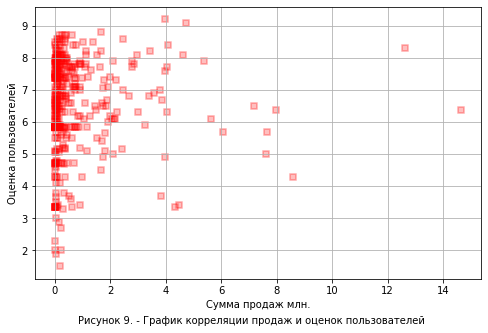

In [69]:
#Проверим, зависят ли продажи от оценки критиков (Построим несколько вариантов графиков)
#Построим диаграмму рассеяния 
plt.figure(figsize=(8, 5))
plt.scatter(ps4['sum_sales'], ps4['user_score'], c='r', linewidths = 2, marker ="s", alpha=0.25)
plt.grid(True)
plt.xlabel('Сумма продаж млн.')
plt.ylabel('Оценка пользователей')
plt.figtext(0.2, 0, "Рисунок 9. - График корреляции продаж и оценок пользователей")

In [70]:
# Посчитаем корреляцию между продажами и оценкой пользователей
ps4['sum_sales'].corr(ps4['user_score'])

0.039751313280408096

In [71]:
# Посчитаем корреляцию между продажами и оценкой критиков на всех платформах
df_2012['sum_sales'].corr(df_2012['critic_score'])

0.30001198359674414

Text(0.3, 0, 'Рисунок 10. - График корреляции продаж и оценок критиков')

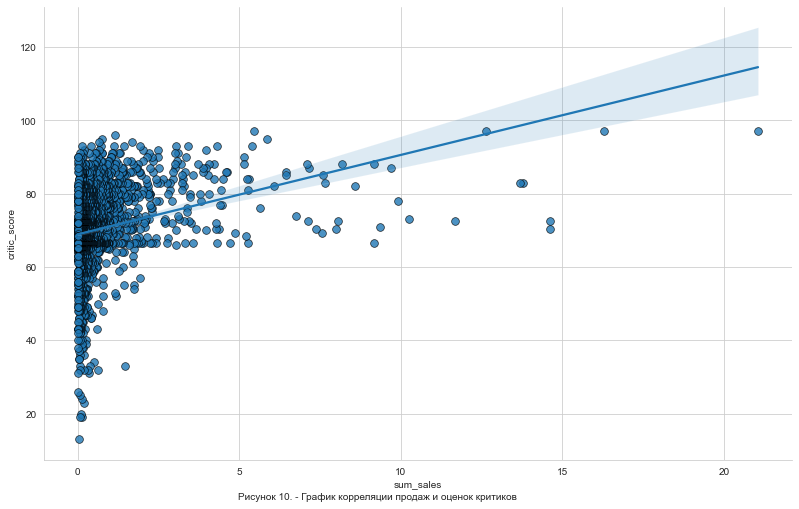

In [72]:
sns.set_style("whitegrid")
corr = sns.lmplot(x='sum_sales', y='critic_score', data=df_2012, 
                     height=7, aspect=1.6, robust=False, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.figtext(0.3, 0, "Рисунок 10. - График корреляции продаж и оценок критиков")

In [73]:
# Посчитаем корреляцию между продажами и оценкой пользователей на всех платформах
df_2012['sum_sales'].corr(df_2012['user_score'])

0.09643138303154941

Text(0.3, 0, 'Рисунок 11. - График корреляции продаж и оценок пользователей')

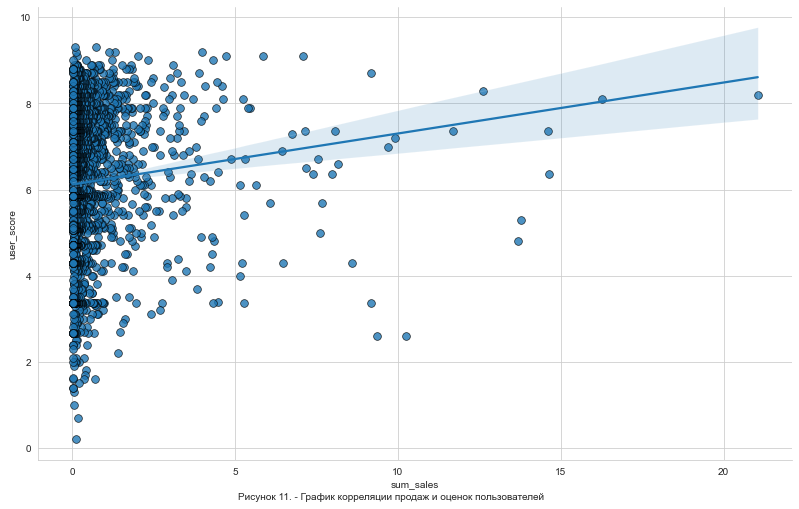

In [74]:
sns.set_style("whitegrid")
corr = sns.lmplot(x='sum_sales', y='user_score', data=df_2012, 
                     height=7, aspect=1.6, robust=False, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.figtext(0.3, 0, "Рисунок 11. - График корреляции продаж и оценок пользователей")

Text(0.3, 0, 'Рисунок 12. - График корреляции всех признаков')

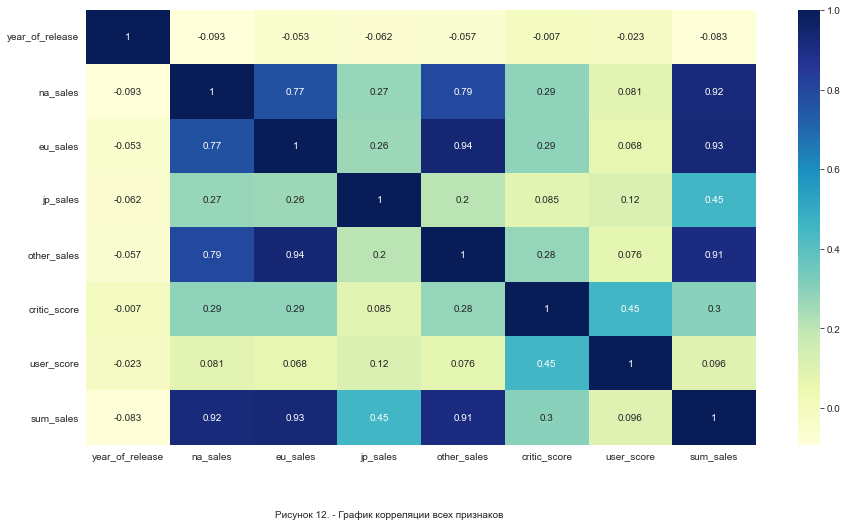

In [75]:
plt.figure(figsize = (15,8))
sns.heatmap(df_2012.corr(), cmap="YlGnBu", annot=True)
plt.figtext(0.3, 0, "Рисунок 12. - График корреляции всех признаков")

#### Вывод

Проанализировав диаграмму рассеяния и получив значени корреляции можно сделать несколько выводов:<br>
1. Корреляция между суммой продаж и оценкой критиков на плаформе ps4 составляет 0.35, это значит, что есть между ними есть прямая связь хоть и не сильная. Чем выше оценка критиков, тем больше сумма продаж игр.<br>
2. Корреляция между суммой продаж и оценкой пользователей на плаформе ps4 составляет 0.03, это значит, что связи между продажими и оценкой пользователей нет<br>
От этого можно полагать, что и на альтернативных платформах также. (Влияние критиков выше, чем влияние пользователей)

### Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [76]:
df_2012.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.00,8.20,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.00,8.10,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,70.28,6.37,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,72.67,7.36,NaN,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.00,5.30,m,13.79


In [77]:
# Посмотрим каких жанров игр больше всего
max_count = df_2012.groupby('genre')['name'].count().reset_index()
max_count.rename(columns= {'name':'count'}, inplace = True)
max_count.sort_values(by='count', ascending=False)

,genre,count
0,action,1041
7,role-playing,370
1,adventure,302
10,sports,268
8,shooter,237
3,misc,193
6,racing,115
2,fighting,109
4,platform,85
9,simulation,80


Text(0.4, -0.1, 'Рисунок 13. - Гистограмма количества игр по жанрам')

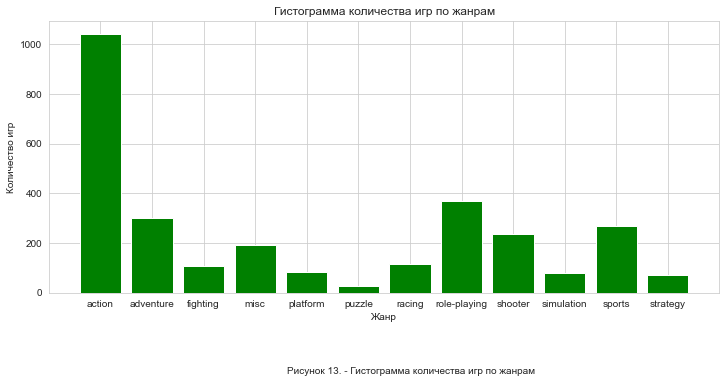

In [78]:
plt.figure(figsize=(12, 5))
plt.bar(max_count['genre'], max_count['count'], color='green')
plt.grid(True)
plt.title('Гистограмма количества игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.figtext(0.4, -0.1, "Рисунок 13. - Гистограмма количества игр по жанрам")

Text(0.3, 0, 'Рисунок 14. - Пайчарт (круговая диаграмма) по доле кол-ва игр в жанре')

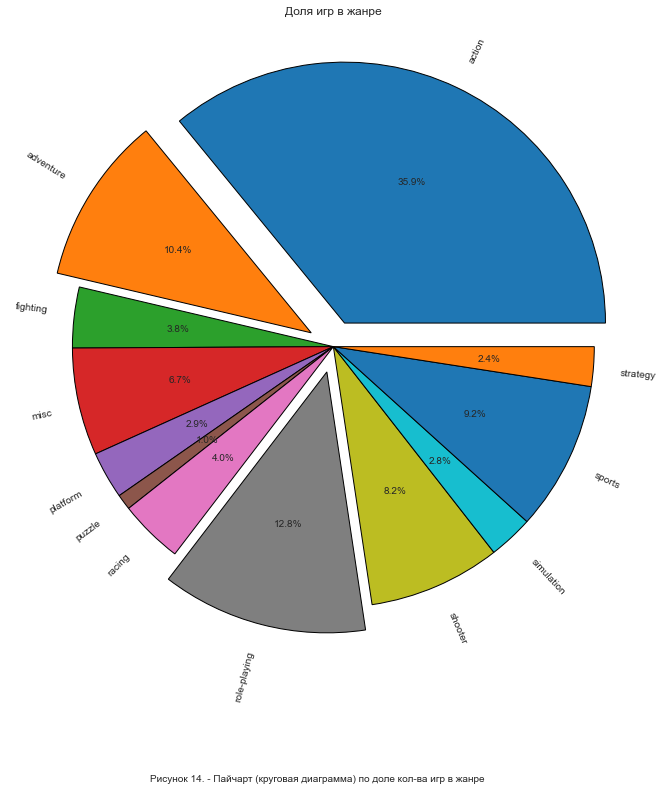

In [79]:
plt.figure(figsize = (12,12))
plt.pie(max_count['count'], labels=max_count['genre'], rotatelabels=True, autopct='%1.1f%%',
        wedgeprops={'lw':1, 'ls':'-','edgecolor':"black"}, explode=(0.1, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0))
plt.title('Доля игр в жанре')
plt.figtext(0.3, 0, "Рисунок 14. - Пайчарт (круговая диаграмма) по доле кол-ва игр в жанре")

Мы наблюдаем, что action / role-playing / adventure  являются самыми популярными жанрами игр за все время.

In [80]:
# Посмотрим какие жанры игр приносят больше всего денег
max_income = df_2012.groupby('genre')['sum_sales'].sum().reset_index()
max_income.sort_values(by='sum_sales', ascending=False)

,genre,sum_sales
0,action,446.41
8,shooter,304.75
7,role-playing,192.80
10,sports,181.07
3,misc,85.28
4,platform,61.00
6,racing,53.50
2,fighting,44.49
9,simulation,35.12
1,adventure,29.43


Text(0.4, -0.1, 'Рисунок 15. - Гистограмма выручки игр по жанрам')

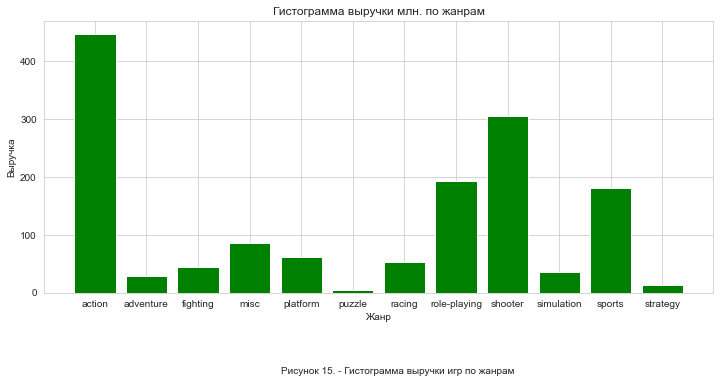

In [81]:
plt.figure(figsize=(12, 5))
plt.bar(max_income['genre'], max_income['sum_sales'], color='green')
plt.grid(True)
plt.title('Гистограмма выручки млн. по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Выручка')
plt.figtext(0.4, -0.1, "Рисунок 15. - Гистограмма выручки игр по жанрам")

Text(0.3, 0, 'Рисунок 16. - Пайчарт (круговая диаграмма) по доле выручки игр в жанре')

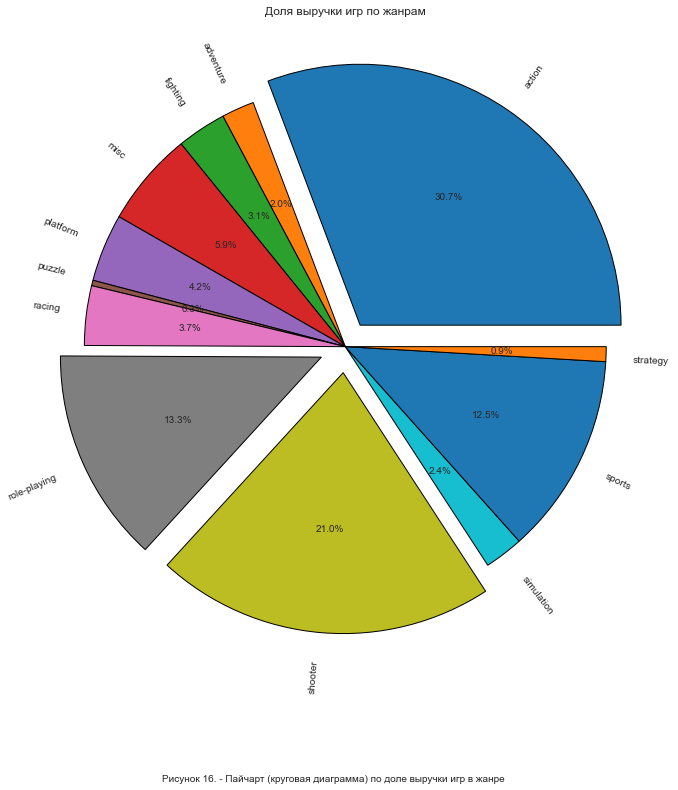

In [82]:
plt.figure(figsize = (12,12))
plt.pie(max_income['sum_sales'], labels=max_income['genre'], rotatelabels=True, autopct='%1.1f%%',
        wedgeprops={'lw':1, 'ls':'-','edgecolor':"black"}, explode=(0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0, 0, 0))
plt.title('Доля выручки игр по жанрам')
plt.figtext(0.3, 0, "Рисунок 16. - Пайчарт (круговая диаграмма) по доле выручки игр в жанре")

Тут же мы видим иное распределение, чем в количестве. Топ 3 по общнй выручке занимают action / shooter / role-playing, а вот adventure лишь на 10 месте. 

In [83]:
# Найдем, сколько средняя прибыль от одной игры в каждом жанре. Так мы поймем какой жанр более прибыльный.
avg_game = (df_2012.groupby('genre')['sum_sales'].sum()) / (df_2012.groupby('genre')['name'].count())#.reset_index()
avg_game.sort_values(ascending=False)


genre
shooter         1.285865
platform        0.717647
sports          0.675634
role-playing    0.521081
racing          0.465217
misc            0.441865
simulation      0.439000
action          0.428828
fighting        0.408165
strategy        0.187887
puzzle          0.174643
adventure       0.097450
dtype: float64

Text(0.3, -0.2, 'Рисунок 17. - Гистограмма средней выручки в жанре')

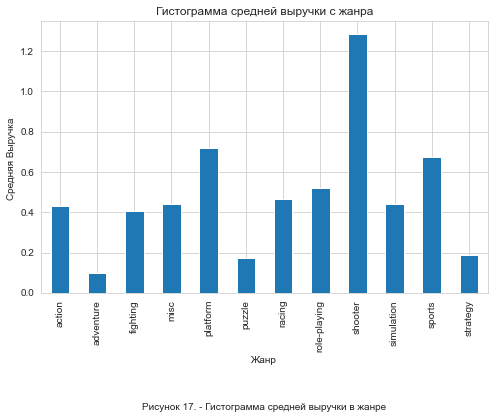

In [84]:
avg_game.plot(grid=True, figsize=(8, 5), kind= 'bar')
plt.title('Гистограмма средней выручки с жанра')
plt.xlabel('Жанр')
plt.ylabel('Средняя Выручка ')
plt.figtext(0.3, -0.2, "Рисунок 17. - Гистограмма средней выручки в жанре")

#### Вывод

Рассматривая игры в разрезе по жанрам, мы можем наблюдать:<br>
1. Самые прибыльные жанры это shooter / platform / sports
2. К наименее прибыльным жанрам можно отнести puzzle / strategy / adventure
3. Самые популярные жанры action / role-playing / adventure

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):<br>
•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.<br>
•	Самые популярные жанры (топ-5). Поясните разницу.<br>
•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?<br>


### Самые популярные платформы (топ-5) каждого региона

In [85]:
# Найдем самые популярные платформы в регионе NA 
na_plat = df_2012.groupby('platform')['na_sales'].sum().reset_index()
na_plat.sort_values(by='na_sales', ascending=False)

,platform,na_sales
9,x360,140.57
4,ps4,108.74
3,ps3,103.74
10,xone,93.12
0,3ds,55.49
8,wiiu,38.10
2,pc,19.26
7,wii,18.14
6,psv,10.98
1,ds,4.93


In [86]:
# Найдем самые популярные платформы в регионе EU 
eu_plat = df_2012.groupby('platform')['eu_sales'].sum().reset_index()
eu_plat.sort_values(by='eu_sales', ascending=False)

,platform,eu_sales
4,ps4,141.09
3,ps3,107.27
9,x360,74.89
10,xone,51.59
0,3ds,42.83
2,pc,38.38
8,wiiu,25.13
7,wii,12.34
6,psv,11.36
1,ds,3.78


In [87]:
# Найдем самые популярные платформы в регионе JP
jp_plat = df_2012.groupby('platform')['jp_sales'].sum().reset_index()
jp_plat.sort_values(by='jp_sales', ascending=False)

,platform,jp_sales
0,3ds,87.79
3,ps3,35.29
6,psv,21.04
4,ps4,15.96
8,wiiu,13.01
5,psp,10.71
1,ds,3.72
7,wii,3.39
9,x360,1.57
10,xone,0.34


In [88]:
# Объединим таблицы по платформам
plat_merg = pd.merge(na_plat, eu_plat)
plat_merg = pd.merge(plat_merg, jp_plat)
plat_merg = plat_merg.set_index('platform')

In [89]:
plat_merg

,na_sales,eu_sales,jp_sales
platform,,,
3ds,55.49,42.83,87.79
ds,4.93,3.78,3.72
pc,19.26,38.38,0.00
ps3,103.74,107.27,35.29
ps4,108.74,141.09,15.96
psp,0.23,0.52,10.71
psv,10.98,11.36,21.04
wii,18.14,12.34,3.39
wiiu,38.10,25.13,13.01


Text(0.3, -0.1, 'Рисунок 18. - Гистограммы выручки по платформам в каждом регионе')

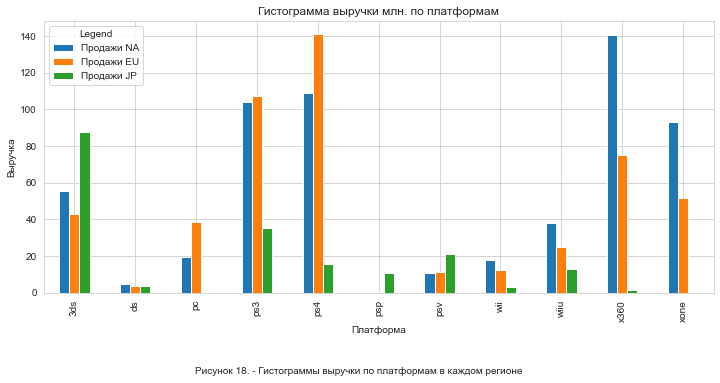

In [90]:
plat_merg.plot(kind='bar', figsize=(12, 5)).legend(['Продажи NA','Продажи EU', 'Продажи JP'], title = "Legend",
                                                  loc=0)
plt.grid(True)
plt.title('Гистограмма выручки млн. по платформам')
plt.xlabel('Платформа')
plt.ylabel('Выручка')
plt.figtext(0.3, -0.1, "Рисунок 18. - Гистограммы выручки по платформам в каждом регионе")

#### Вывод

Мы можем наблюдать различия в топ-5 платформ в каждом регионе:
1. Жители Европы предпочитают такие платформы, как ps4, ps3, x360, xone, 3ds<br>
2. Жители Северной Америки выбирают x360, ps4, ps3, xone, 3ds<br>
3. Жители Японии больше используют ps3, ps3, psv, ps4, wiiu<br>

У каждого региона свои лидеры, Япония больше предпочитает портативные консоли. Европа придерживаются приставок Sony, а вот Америка поддерживает Microsoft.


### Самые популярные жанры (топ-5).

In [91]:
# Найдем самые популярные жанры в регионе NA 
na_genre = df_2012.groupby('genre')['na_sales'].sum().reset_index()
na_genre.sort_values(by='na_sales', ascending=False)

,genre,na_sales
0,action,180.15
8,shooter,144.79
10,sports,81.53
7,role-playing,64.00
3,misc,38.19
4,platform,25.38
2,fighting,19.79
6,racing,17.22
1,adventure,8.92
9,simulation,7.97


In [92]:
# Найдем самые популярные жанры в регионе EU 
eu_genre = df_2012.groupby('genre')['eu_sales'].sum().reset_index()
eu_genre.sort_values(by='eu_sales', ascending=False)

,genre,eu_sales
0,action,161.70
8,shooter,113.47
10,sports,69.09
7,role-playing,48.53
6,racing,27.29
3,misc,26.32
4,platform,21.41
9,simulation,14.55
2,fighting,10.79
1,adventure,9.46


In [93]:
# Найдем самые популярные жанры в регионе JP 
jp_genre = df_2012.groupby('genre')['jp_sales'].sum().reset_index()
jp_genre.sort_values(by='jp_sales', ascending=False)

,genre,jp_sales
7,role-playing,65.44
0,action,52.80
3,misc,13.10
9,simulation,10.41
2,fighting,9.44
8,shooter,9.23
4,platform,8.63
1,adventure,8.24
10,sports,8.01
11,strategy,2.88


In [94]:
# Объединим таблицы по платформам
genre_merg = pd.merge(na_genre, eu_genre)
genre_merg = pd.merge(genre_merg, jp_genre)
genre_merg = genre_merg.set_index('genre')

In [95]:
genre_merg

,na_sales,eu_sales,jp_sales
genre,,,
action,180.15,161.70,52.80
adventure,8.92,9.46,8.24
fighting,19.79,10.79,9.44
misc,38.19,26.32,13.10
platform,25.38,21.41,8.63
puzzle,1.13,1.40,2.14
racing,17.22,27.29,2.50
role-playing,64.00,48.53,65.44
shooter,144.79,113.47,9.23


Text(0.4, -0.2, 'Рисунок 19. - Гистограммы выручки по жанрам в каждом регионе')

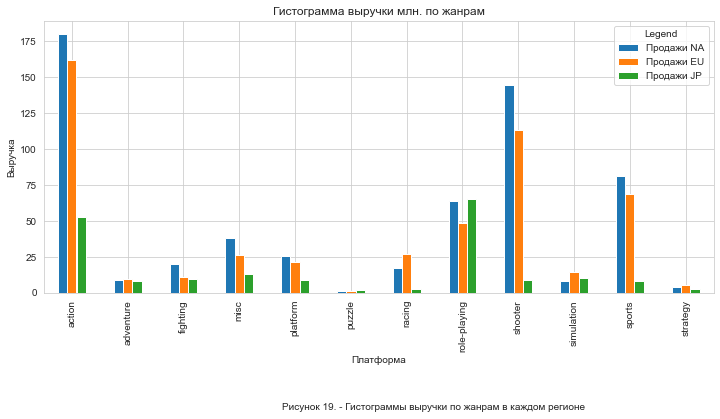

In [96]:
genre_merg.plot(kind='bar', figsize=(12, 5)).legend(['Продажи NA','Продажи EU', 'Продажи JP'], title = "Legend",
                                                  loc=0)
plt.grid(True)
plt.title('Гистограмма выручки млн. по жанрам')
plt.xlabel('Платформа')
plt.ylabel('Выручка')
plt.figtext(0.4, -0.2, "Рисунок 19. - Гистограммы выручки по жанрам в каждом регионе")

#### Вывод

Мы можем наблюдать различия в топ-5 жанров в каждом регионе:
1. Жители Европы предпочитают такие жанры, как action, shooter, sports, role-playing, misc<br>
2. Жители Северной Америки выбирают action, shooter, sports, role-playing, racing<br>
3. Жители Японии больше используют role-playing, action, misc, simulation, fighting<br>

В данном исследовании мы можем наблюдать то, что жанры на рынках EU и NA очень схожи, пратически идентичны, а вот жители JP предпочитают иные жанры, схожи с EU и NA только в двух жанрах. 

###  Анализ влияния рейтинга ESRB на продажи в отдельном регионе

In [97]:
df_2012.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.00,8.20,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.00,8.10,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,70.28,6.37,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,72.67,7.36,NaN,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.00,5.30,m,13.79


In [98]:
df_2012['rating'].isna().sum() # Треть игр не имеет рейтига

1124

In [99]:
# Проверим уникальные значения методом unique()
df_2012['rating'].unique()

array(['m', nan, 'e', 'e10+', 't'], dtype=object)

Мы видим 4 варианта рейтинга "M" / "E" / "E10+" / "T" <br>
"E" - Для всех, старше 6 лет<br>
"E10+" - Для всех, старше 10 лет<br>
"T" - Подросткам, старше 13 лет<br>
"M" - Для взрослых, старше 17 лет<br>

In [100]:
# Найдем суммы выручки в зависимости от рейтинга в регионе JP
jp_rating = df_2012.groupby('rating')['jp_sales'].sum().reset_index()
jp_rating.sort_values(by = 'jp_sales',  ascending=False)

,rating,jp_sales
0,e,29.27
3,t,29.13
2,m,22.59
1,e10+,8.57


Text(0.2, 0, 'Рисунок 20. - Пайчарт (круговая диаграмма) по доле выручки игр в возрастном рейтинге в JP')

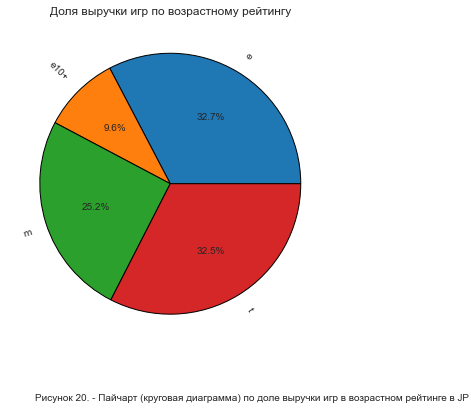

In [101]:
# Найдем доли в %
plt.figure(figsize = (6,6))
plt.pie(jp_rating['jp_sales'], labels=jp_rating['rating'], rotatelabels=True, autopct='%1.1f%%',
        wedgeprops={'lw':1, 'ls':'-','edgecolor':"black"})
plt.title('Доля выручки игр по возрастному рейтингу')
plt.figtext(0.2, 0, "Рисунок 20. - Пайчарт (круговая диаграмма) по доле выручки игр в возрастном рейтинге в JP")

В регионе JP мы наблюдаем одинаковые доли в рейтинге "е" и рейтинге "т" по 33%, немного ниже доля "м" 25% и 10% доля "е10+" 

In [102]:
# Найдем суммы выручки в зависимости от рейтинга в регионе EU
eu_rating = df_2012.groupby('rating')['eu_sales'].sum().reset_index()
eu_rating.sort_values(by = 'eu_sales', ascending=False)

,rating,eu_sales
2,m,206.43
0,e,115.38
1,e10+,59.82
3,t,57.04


Text(0.2, 0, 'Рисунок 21. - Пайчарт (круговая диаграмма) по доле выручки игр в возрастном рейтинге в EU')

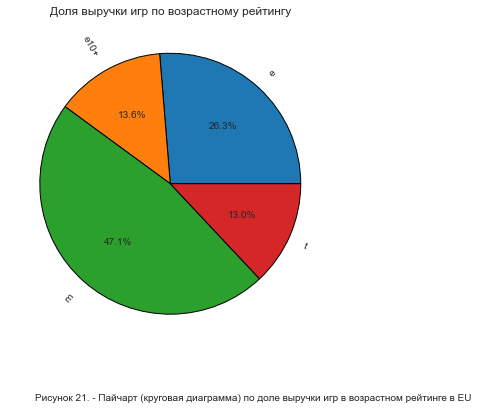

In [103]:
# Найдем доли в %
plt.figure(figsize = (6,6))
plt.pie(eu_rating['eu_sales'], labels=eu_rating['rating'], rotatelabels=True, autopct='%1.1f%%',
        wedgeprops={'lw':1, 'ls':'-','edgecolor':"black"})
plt.title('Доля выручки игр по возрастному рейтингу')
plt.figtext(0.2, 0, "Рисунок 21. - Пайчарт (круговая диаграмма) по доле выручки игр в возрастном рейтинге в EU")

В регионе EU мы наблюдаем большую долю в рейтинге "м" 47%, ниже доля "е" 26% и совсем малые доли у "е10+" и "т" по 13%

In [104]:
# Найдем суммы выручки в зависимости от рейтинга в регионе NA
na_rating = df_2012.groupby('rating')['na_sales'].sum().reset_index()
na_rating.sort_values(by = 'na_sales', ascending=False)

,rating,na_sales
2,m,242.34
0,e,117.76
1,e10+,80.10
3,t,69.80


Text(0.2, 0, 'Рисунок 22. - Пайчарт (круговая диаграмма) по доле выручки игр в возрастном рейтинге в NA')

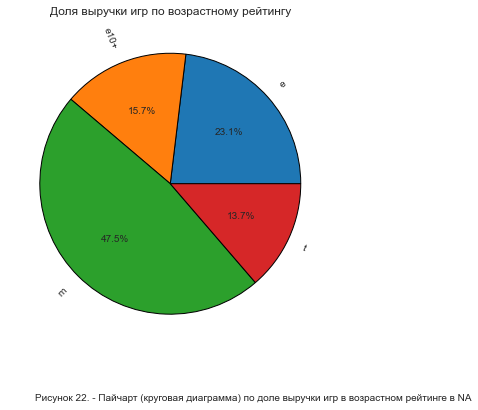

In [105]:
# Найдем доли в %
plt.figure(figsize = (6,6))
plt.pie(na_rating['na_sales'], labels=na_rating['rating'], rotatelabels=True, autopct='%1.1f%%',
        wedgeprops={'lw':1, 'ls':'-','edgecolor':"black"})
plt.title('Доля выручки игр по возрастному рейтингу')
plt.figtext(0.2, 0, "Рисунок 22. - Пайчарт (круговая диаграмма) по доле выручки игр в возрастном рейтинге в NA")

В регионе NA мы наблюдаем схожие доли с EU, большую долю в рейтинге "м" 48%, ниже доля "е" 23% и совсем малые доли у "е10+" 16% и "т" 14%

In [106]:
rating_marg = pd.merge(jp_rating, eu_rating)
rating_marg = pd.merge(rating_marg, na_rating)
rating_marg = rating_marg.set_index('rating')
rating_marg

,jp_sales,eu_sales,na_sales
rating,,,
e,29.27,115.38,117.76
e10+,8.57,59.82,80.10
m,22.59,206.43,242.34
t,29.13,57.04,69.80


Text(0.3, -0.1, 'Рисунок 23. - Гистограмма по доле выручки игр в возрастном рейтинге')

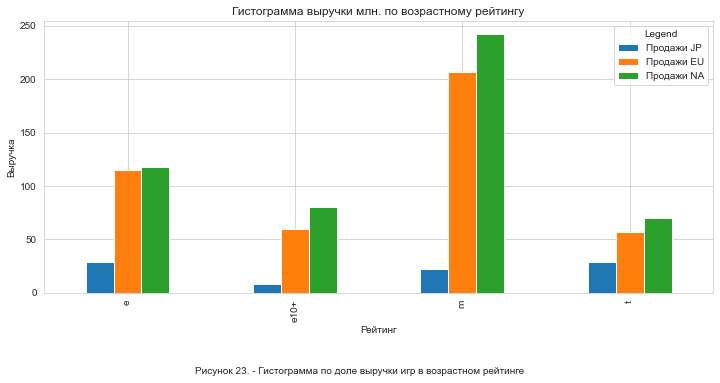

In [107]:
rating_marg.plot(kind='bar', figsize=(12, 5)).legend(['Продажи JP','Продажи EU', 'Продажи NA'], title = "Legend",
                                                  loc=0)
plt.grid(True)
plt.title('Гистограмма выручки млн. по возрастному рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Выручка')
plt.figtext(0.3, -0.1, "Рисунок 23. - Гистограмма по доле выручки игр в возрастном рейтинге")

#### Вывод

Проведя анализ по нескольким направлениям, мы можем сделать порттрет пользователя каждого региона:
1. Пользователи региона NA предпочитают платформы x360, ps4, чаще всего выбирают такие жанры, как action, shooter, sports и в своем большенсве игры в рейтинге "M" - Для взрослых, старше 17 лет.
2. Пользователи региона EU очень схожи с регионом NA, они так же предпочитают платформы ps4, ps3, также чаще всего выбирают такие жанры, как action, shooter, sports и в своем большенсве игры в рейтинге "M" - Для взрослых, старше 17 лет.
3. А вот пользователи региона JP являются достаточно особенными. Они не типичны для европейской и американской аудитории. Они часто выбирают портативные платформы 3ds, psv, но так же пользуются ps3. В выборе жанров они тоже отличились. Их популярные жанры ole-playing, action, misc. И регион JP так же смотрит на рейтинг ESRB и в этом регионе на первом месте игры в рейтинге "E" - Для всех, старше 6 лет

## Проверка гипотиз

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Мы формилируем нулевую гипотезу H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны.<br>
Формилируем альтернативную гипотезу H₁ - средние пользовательские рейтинги платформ Xbox One и PC различается.<br>
Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.st.ttest_ind (array1, array2,equal_var)`

In [108]:
# Сделаем два среза(первый будет платформа Xbox One,  второй - PC)
xone_user_score = df_2012.query('platform == "xone"')
pc_user_score = df_2012.query('platform == "pc"')

In [109]:
# Проверим дисперсии выборок для определения параметра equal_var (True или False)
xone_dis = np.var(xone_user_score['user_score'])
print('Дисперсия xone_user_score:', xone_dis) 
pc_dis = np.var(pc_user_score['user_score'])
print('Дисперсия pc_user_score:', pc_dis) 

Дисперсия xone_user_score: 2.0179446835712764
Дисперсия pc_user_score: 2.7498637970011535


Text(0.3, 0, 'Рисунок 24. - Гистограммы распределения оценок критиков на платформах xone и pc')

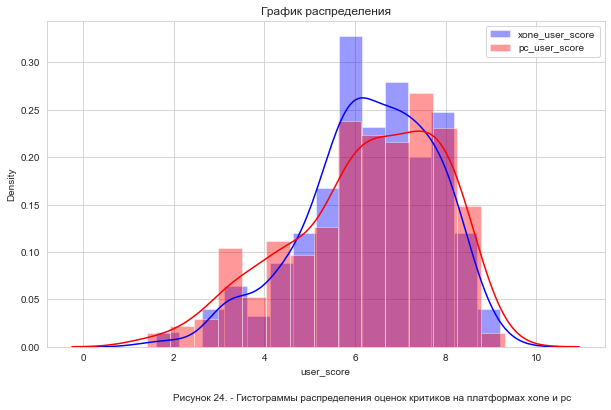

In [110]:
# Посмотрим на распределение
plt.figure(figsize=(10, 6))
sns.distplot(xone_user_score['user_score'], bins = 15, color = 'b', label = 'xone_user_score')
sns.distplot(pc_user_score['user_score'], bins = 15, color = 'r', label = 'pc_user_score')
plt.title('График распределения')
plt.legend()
plt.figtext(0.3, 0, "Рисунок 24. - Гистограммы распределения оценок критиков на платформах xone и pc")

In [111]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвегнем гипотезу

# Так как дисперсии двух выборок не равны, мы используем equal_var=False
results = st.ttest_ind(
    xone_user_score['user_score'], 
    pc_user_score['user_score'],
    equal_var= False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.6700843103207661
Не получилось отвергнуть нулевую гипотезу


#### Вывод

Мы получили значение p-значение: 0.67, которое значительно выше заданного alpha. Это значит, что 67% значений попдают в наш диапазон. Получается, что средние пользовательские рейтинги платформ Xbox One и PC практически не отличается. И у нас нет достаточно фактов для отвержения нулевой гипотезы H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Мы формилируем нулевую гипотезу H₀ - средние пользовательские рейтинги жанров Action и Sports равны.<br>
Формилируем альтернативную гипотезу H₁ - средние пользовательские рейтинги жанров Action и Sports различается.<br>
Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.st.ttest_ind (array1, array2,equal_var)`

In [112]:
# Сделаем два среза(первый будет жанр Action,  второй - Sports)
action_user_score = df_2012.query('genre == "action"')
sports_user_score = df_2012.query('genre == "sports"')

In [113]:
# Проверим дисперсии выборок для определения параметра equal_var (True или False)
xone_dis = np.var(action_user_score['user_score'])
print('Дисперсия action_user_score:', xone_dis) 
pc_dis = np.var(sports_user_score['user_score'])
print('Дисперсия sports_user_score:', pc_dis) 

Дисперсия action_user_score: 1.339287283803998
Дисперсия sports_user_score: 2.2966627018823793


Text(0.3, 0, 'Рисунок 25. - Гистограммы распределения оценок пользователей на платформах xone и pc')

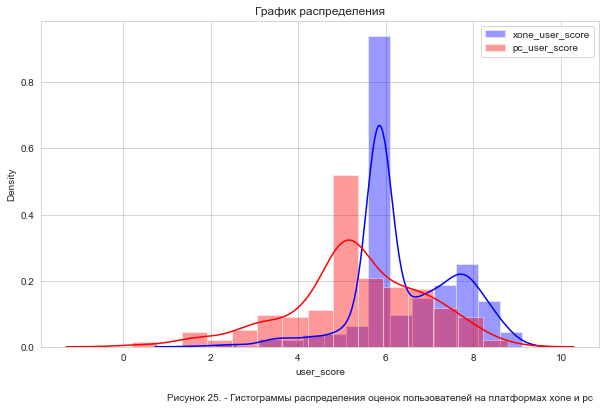

In [114]:
# Посмотрим на распределение
plt.figure(figsize=(10, 6))
sns.distplot(action_user_score['user_score'], bins = 15, color = 'b', label = 'xone_user_score')
sns.distplot(sports_user_score['user_score'], bins = 15, color = 'r', label = 'pc_user_score')
plt.title('График распределения')
plt.legend()
plt.figtext(0.3, 0, "Рисунок 25. - Гистограммы распределения оценок пользователей на платформах xone и pc")

In [115]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    action_user_score['user_score'], 
    sports_user_score['user_score'],
    equal_var= False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.1458387410751644e-23
Отвергаем нулевую гипотезу


#### Вывод

Мы получили значение p-значение:  1.14e-23, которое значительно ниже заданного alpha. Получается, средние пользовательские рейтинги жанров Action и Sports различается. И у нас достаточно фактов для отвержения нулевой гипотезы H₀ - средние пользовательские рейтинги жанров Action и Sports равны.

## Общий вывод

Анализируя датасет:
- Мы импортировали библиотеки (pandas, matplotlib.pyplot, seaborn, numpy, math, stats)
- Прочли исхдные DF.  И добавили описание данных.
- Проверили данные DF на наличие пропущенных значений.
- Все названия столбцов были приведины к нижнему регистру.
- Все значения столбцов были приведины к нижнему регистру. (где было это возможно)
- Пропуски были в df[Year_of_Release], df[Critic_Score], df[User_Score], df[Rating].
- В df[Year_of_Release] мы заменили пропуски у одинаковых игр тем же значением, которым могла обладать игра на другой платформе.
- В df[Critic_Score] мы заменили пропуски средним значеним относительно жанра игры, для того, чтобы в дальнейшем они не влияли на общий результат.
- В df[User_Score] мы заменили пропуски средним значеним относительно жанра игры, для того, чтобы в дальнейшем они не влияли на общий результат.
- В df[Rating] мы заменили пропуски у одинаковых игр тем же значением, которым могла обладать игра на другой платформе. Но большую част оставили пропусками.
- Столбцы df[Rating], df[name], df[genre], df[platform] были проверен на неявные дубликаты.
- Столбцы df[Critic_Score], df[User_Score] были округлены до сотых значений после точки методом .round(2)

Переходя к итогам исследования:
1. Мы определили важные для нас периоды для исследования.
2. Мы определили сколько срок "жизни" платформы. Он составил 5-6 лет.
3. Выделили период, необходимый нам для прогнозирования перспективной платформы и жанра на 2017 год. Данный период составил 2012-2016 годы.
4. Нашли песпективные платформы на 2017 год. Это были ps4 и xone
5. Использовали ящик с усами. Поняли, что график имеет не нормальное распределение, но и не имеет выбросов.
6. Оценили корреляции таких параметров как: сумма продаж к рейтингу критиков и сумма продаж к рейтингу пользователей.
7. Построили к данным вычислениям диаграммы рассеяния.
8. Посмотрели, как игры распределяются по жанрам. Какие жанры чаще выпускают, какие жанры больше приносят в сумме денег, какие жанры в среднем самые прибыльные.
9. Далее мы сделали портрет пользователя каждого из представленных регионов.
10. Нашли Топ-5 самых популярных платформ в каждом регионе.
11. Нашли Топ-5 самых популярных жанров в каждом регионе.
12. Проанализировали влияние рейтинга ESRB на продажи в отдельном регионе.
13. Проверели две гипотизы.

Можно сделать такие выводы:
1. Мы наблюдаем, что в разных регионах исследования (NA, EU и JP) пользователи ведут себя по разному. И для выбора перспективной игры и популярной платформы на 2017 год нужно отталкиваться от региона. Мы видим определенное сходство двух регионов NA и EU, но значительное отличие от региона JP. 
2. Гипотиза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" можно считать правдивой. Получается, что средние пользовательские рейтинги платформ Xbox One и PC практически не отличается. И у нас нет достаточно фактов для отвержения нулевой гипотезы H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны.
3. Гипотиза "Средние пользовательские рейтинги жанров Action и Sports разные." можно считать ложной, так как иследования показали, средние пользовательские рейтинги жанров Action и Sports различается. И у нас достаточно фактов для отвержения нулевой гипотезы H₀ - средние пользовательские рейтинги жанров Action и Sports равны.